# 13.4. Using Confidence Intervals

- A **confidence interval** has a single purpose – to **estimate an unknown parameter** based on data in a random sample.
- by our estimate, **the percent of smokers** among the mothers in the population was somewhere **between 36% and 42%**, and that our process of estimation is **correct about 95% of the time**.
- A dismayingly common **misuse** of the interval is to conclude that about 95% of the women were between 26.9 years and 27.6 years old.
- The interval just estimates one number: the **average** of all the ages in the population
- *However, estimating a parameter by confidence intervals does have an important use besides just telling us roughly how big the parameter is.*

In [1]:
path_data = '../../data/'
from datascience import *
import matplotlib.pyplot as plt
%matplotlib inline

births = Table.read_table(path_data + 'baby.csv')

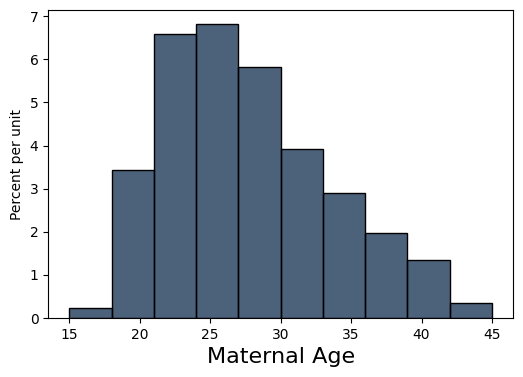

In [2]:
births.select('Maternal Age').hist()

## 13.4.1. Using a Confidence Interval to Test Hypotheses

- Our approximate 95% confidence interval for the average age in the population goes from 26.9 years to 27.6 years.

Suppose someone wants to test the following hypotheses:
- Null hypothesis: The average age in the population is 30 years.
- Alternative hypothesis: The average age in the population is not 30 years.

## 13.4.2. Comparing Baseline and Post-Treatment Scores

- Hodgkin's disease

In [15]:
hodgkins = Table.read_table(path_data + 'hodgkins.csv')
hodgkins.show(2)

height,rad,chemo,base,month15
164,679,180,160.57,87.77
168,311,180,98.24,67.62


In [20]:
# hodgkins_with_drop = hodgkins.with_column('drop', hodgkins.column('base') - hodgkins.column('month15'))
hodgkins = hodgkins.with_column('drop', hodgkins.column('base') - hodgkins.column('month15')).sort('drop', descending=True)
hodgkins 

height,rad,chemo,base,month15,drop
164,679,180,160.57,87.77,72.8
170,341,96,150.51,80.97,69.54
163,453,134,129.88,69.24,60.64
173,322,119,85,41.96,43.04
185,392,240,149.84,106.99,42.85
170,252,150,98.29,55.51,42.78
181,539,196,129.75,90.78,38.97
173,270,160,115.02,81.12,33.9
175,529,264,87.45,56.48,30.97
168,311,180,98.24,67.62,30.62


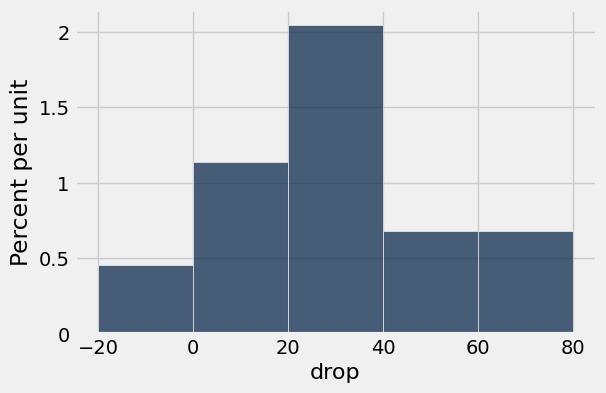

In [24]:
import numpy as np

# hodgkins.select('drop').hist()
# plt.style.use('dark_background')
hodgkins.select('drop').hist(bins=np.arange(-20, 81, 20))

In [25]:
np.average(hodgkins.column('drop'))
### average drop

28.615909090909096

- **Null hypothesis**: In the population, the average drop is 0.
- **Alternative hypothesis**: In the population, the average drop is not 0.

In [26]:
def one_bootstrap_mean():
    resample = hodgkins.sample()
    return np.average(resample.column('drop'))

In [28]:
repetitions = 10000
bootstrap_means = make_array()
for i in np.arange(repetitions):
    bootstrap_means = np.append(
        bootstrap_means, one_bootstrap_mean()
    )

In [29]:
bootstrap_means

array([ 31.29090909,  26.25454545,  28.42090909, ...,  24.79136364,
        31.45272727,  22.37136364])

In [30]:
# bootstrap_means_tble = Table().with_column('Bootstrap Means', bootstrap_means).hist()
bootstrap_means_tble = Table().with_column('Bootstrap Means', bootstrap_means)

In [32]:
# 99% CI
left = percentile(1, bootstrap_means)
right = percentile(99, bootstrap_means)
make_array(left, right)

array([ 18.32318182,  39.32090909])

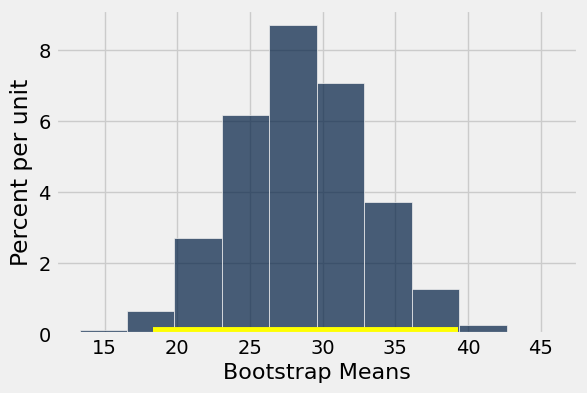

In [34]:
bootstrap_means_tble.hist()
plt.style.use('fivethirtyeight')
plt.plot([left, right], [0,0], color='yellow', lw=10)

In [13]:
# plt.style.available

In [14]:
### The interval does not inlcude 0. Therefore we reject the null hypothesis